In [2]:
import pandas as pd
from surprise import KNNWithZScore
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold

from read_and_split_data import split_data

In [2]:
def get_dataset():
    anime = pd.read_parquet("../datasets/anime.parquet")
    anime = anime[["anime_id", "type"]]
    users = pd.read_parquet("../datasets/users.parquet")
    base_df = users.merge(anime, on="anime_id", how="left")
    return base_df

base_df = get_dataset()
data = split_data(base_df)

In [3]:
kf = KFold(n_splits=5)

In [4]:
def predict_and_error(data, algo):
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        # Mean Squared Error
        accuracy.rmse(predictions, verbose=True)
        # Mean Absolute Erro
        accuracy.mse(predictions, verbose=True)
        # Mean Absolute Erro
        accuracy.mae(predictions, verbose=True)
        # Fraction of Concordant Pairs
        accuracy.fcp(predictions, verbose=True)
    return predictions

### Cosine Similarity

In [5]:
algo = KNNWithZScore(k=7, sim_options={"name": "cosine", "user_based": False})

In [6]:
predictions = predict_and_error(data, algo)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.1625
MSE: 4.6762
MAE:  1.4785
FCP:  0.6785
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.1613
MSE: 4.6711
MAE:  1.4765
FCP:  0.6799
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.1611
MSE: 4.6703
MAE:  1.4759
FCP:  0.6792
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.1604
MSE: 4.6673
MAE:  1.4770
FCP:  0.6794
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.1579
MSE: 4.6565
MAE:  1.4741
FCP:  0.6812


In [7]:
df = pd.DataFrame(columns=["user", "anime", "actual", "est", "details"], data=predictions)

In [8]:
df.sample()

,user,anime,actual,est,details
364733,31928,10620,10.0,8.733615,"{'actual_k': 7, 'was_impossible': False}"


In [9]:
df.to_csv("../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine.csv")
df.to_parquet("../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine.parquet")

### Mean Squared Difference

In [10]:
algo = KNNWithZScore(k=7, sim_options={"name": "msd", "user_based": False})

In [11]:
predictions_msd = predict_and_error(data, algo)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1626
MSE: 4.6770
MAE:  1.4752
FCP:  0.6780
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1632
MSE: 4.6796
MAE:  1.4766
FCP:  0.6776
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1632
MSE: 4.6796
MAE:  1.4752
FCP:  0.6778
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1676
MSE: 4.6985
MAE:  1.4790
FCP:  0.6769
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1702
MSE: 4.7097
MAE:  1.4801
FCP:  0.6772


In [12]:
df = pd.DataFrame(columns=["user", "anime", "actual", "est", "details"], data=predictions_msd)

In [13]:
df.to_csv("../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_msd.csv")
df.to_parquet("../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_msd.parquet")

### Pearson

In [14]:
algo = KNNWithZScore(k=7, sim_options={"name": "pearson", "user_based": False})

In [15]:
predictions_pearson = predict_and_error(data, algo)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.1722
MSE: 4.7185
MAE:  1.4874
FCP:  0.6739
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.1744
MSE: 4.7280
MAE:  1.4887
FCP:  0.6752
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.1704
MSE: 4.7105
MAE:  1.4857
FCP:  0.6750
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.1695
MSE: 4.7065
MAE:  1.4837
FCP:  0.6738
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.1663
MSE: 4.6928
MAE:  1.4834
FCP:  0.6739


In [16]:
df = pd.DataFrame(columns=["user", "anime", "actual", "est", "details"], data=predictions_pearson)

In [17]:
df.to_csv("../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson.csv")
df.to_parquet("../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson.parquet")

### Pearson Baseline

In [18]:
algo = KNNWithZScore(k=7, sim_options={"name": "pearson_baseline", "user_based": False})

In [19]:
predictions_pearson_baseline = predict_and_error(data, algo)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0484
MSE: 4.1959
MAE:  1.3827
FCP:  0.7188
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0496
MSE: 4.2007
MAE:  1.3812
FCP:  0.7192
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0506
MSE: 4.2049
MAE:  1.3824
FCP:  0.7189
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0514
MSE: 4.2083
MAE:  1.3833
FCP:  0.7180
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0495
MSE: 4.2003
MAE:  1.3826
FCP:  0.7182


In [20]:
df = pd.DataFrame(columns=["user", "anime", "actual", "est", "details"], data=predictions_pearson_baseline)

In [21]:
df.to_csv("../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_baseline.csv")
df.to_parquet("../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_pearson_baseline.parquet")

## Graphs

### Cosine graph

In [3]:
df = pd.read_parquet("../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine.parquet")

In [4]:
df.sample()

,user,anime,actual,est,details
991610,19989,6880,9.0,7.670362,"{'actual_k': 7.0, 'reason': None, 'was_impossi..."


In [16]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

/Users/eduardagoulart/Documents/study/compare_ml_algorithms/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/eduardagoulart/Documents/study/compare_ml_algorithms/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='actual', ylabel='Density'>

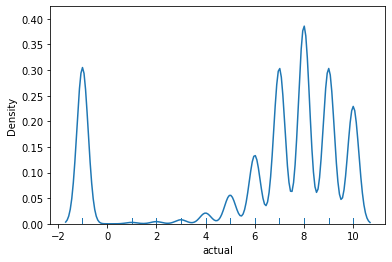

In [18]:
sns.distplot(df["actual"], rug=True, hist=False)

/Users/eduardagoulart/Documents/study/compare_ml_algorithms/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/eduardagoulart/Documents/study/compare_ml_algorithms/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='est', ylabel='Density'>

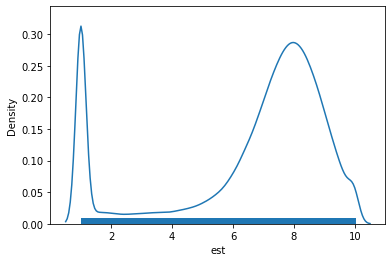

In [19]:
sns.distplot(df["est"], rug=True, hist=False)